## Student Performance Indicator - Machine Learning Project

### 1. Understanding the Problem Statement
The goal of this project is to analyze how various factors such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course affect students' performance (test scores).

### 2. Data Collection
### Dataset Source
The dataset can be found at [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977).

The dataset consists of 8 columns and 1000 rows.

### 2.1 Import Data and Required Packages

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Load the dataset into a Pandas DataFrame

In [3]:
df = pd.read_csv('data/raw.csv')

### Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- **gender**: Indicates the gender of the students (Male/Female).
- **race/ethnicity**: Represents the ethnicity of the students (Group A, B, C, D, E).
- **parental level of education**: Shows the highest level of education attained by the parents (Bachelor's degree, Some college, Master's degree, Associate's degree, High school).
- **lunch**: Specifies whether the student had lunch before the test (Standard or Free/Reduced).
- **test preparation course**: Indicates if the test preparation course was completed or not (Complete/Not Complete).
- **math score**: The score achieved in math.
- **reading score**: The score achieved in reading.
- **writing score**: The score achieved in writing.

## 3. Data Checks to Perform
1. **Check for missing values**: Identify any missing entries in the dataset.
2. **Check for duplicates**: Detect duplicate records in the dataset.
3. **Check data types**: Verify the data types of each column.
4. **Check the number of unique values**: Determine the number of unique values in each column.
5. **Check statistics**: Review summary statistics of the dataset.
6. **Check categories in categorical columns**: Examine the various categories present in the categorical columns.

### 3.1 Check for Missing Values



In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.1 Check for Missing Values
No missing values were found in the dataset.

### 3.2 Check for Duplicates

In [7]:
df.duplicated().sum(0)

np.int64(0)

No duplicate records were found in the dataset.

### 3.3 Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the Number of Unique Values in Each Column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
- The mean scores across all subjects (Math, Reading, Writing) are closely aligned, ranging between 66 and 68.05.
- The standard deviations are similarly close, between 14.6 and 15.19, indicating consistent variability in scores.
- The minimum scores show some variation:
  - Math has a minimum score of 0.
  - Writing has a higher minimum score of 10.
  - Reading has the highest minimum score of 17.

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in gender variable:      ", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variable:       ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable:      ", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variable:      ", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable:      ", end=" ")
print(df['test preparation course'].unique())



Categories in gender variable:       ['female' 'male']
Categories in race/ethnicity variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:       ['standard' 'free/reduced']
Categories in test preparation course variable:       ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding Columns for "Total Score" and "Average"

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')




Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
- Based on the previous analysis, students have performed the worst in the Math section.
- The best performance is observed in the Reading section.

### 4. Exploring Data (Visualization)

#### 4.1 Visualizing Average Score Distribution
To understand the distribution of average scores, we will visualize the data using a **Histogram** and **Kernel Density Estimate (KDE)** plot.

##### 4.1.1 Histogram & KDE

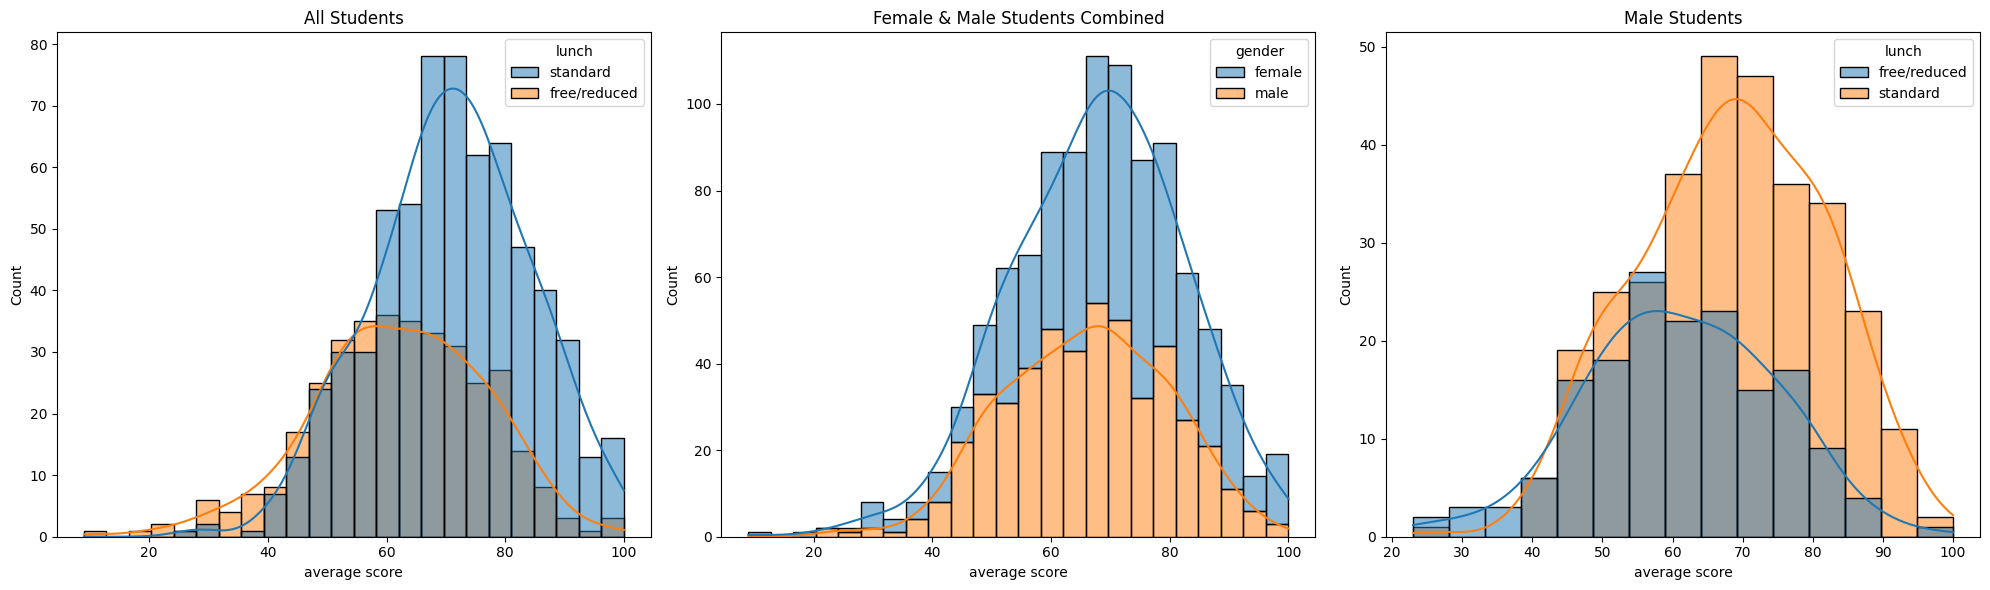

In [19]:
# Create a 1x3 grid of subplots
plt.subplots(1, 3, figsize=(20, 6))

# Plot for all students
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.title('All Students')

# Plot for female and male students combined, with different colors
plt.subplot(132)
sns.histplot(data=df, x='average score', kde=True, hue='gender', multiple="stack")
plt.title('Female & Male Students Combined')

# Plot for male students
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average score', kde=True, hue='lunch')
plt.title('Male Students')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




### Insights
- Students who have a standard lunch tend to perform better in exams.
- The positive impact of having a standard lunch on exam performance is observed for both male and female students.


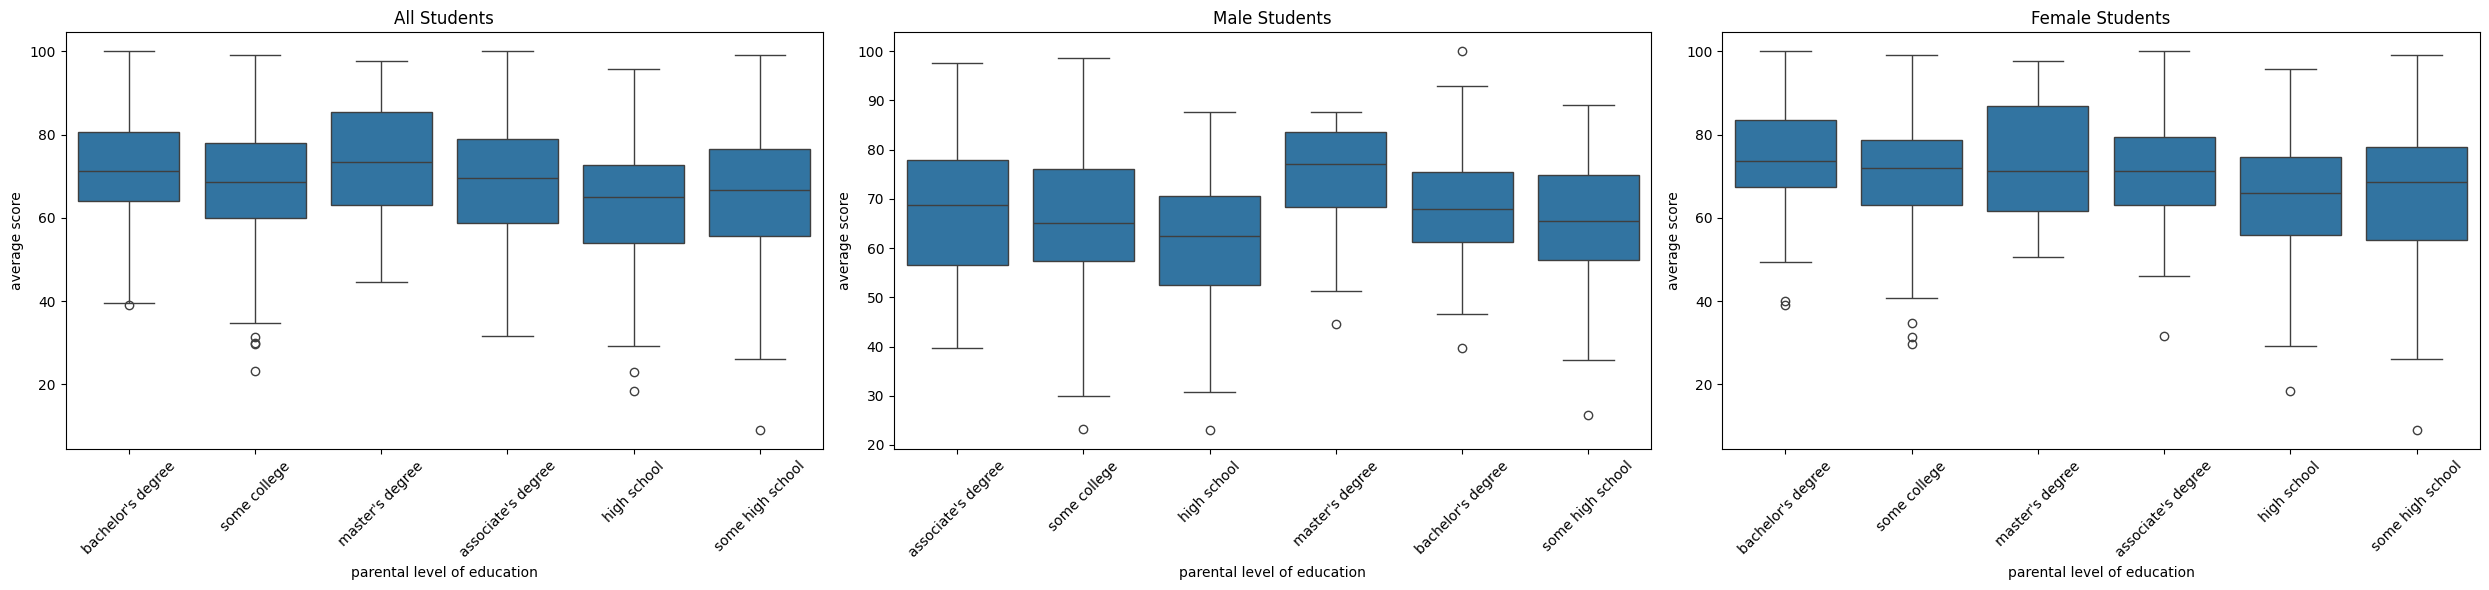

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.subplots(1, 3, figsize=(25, 6))

# Boxplot for all students showing average scores by parental level of education
plt.subplot(131)
sns.boxplot(data=df, x='parental level of education', y='average score')
plt.title('All Students')
plt.xticks(rotation=45)

# Boxplot for male students showing average scores by parental level of education
plt.subplot(132)
sns.boxplot(data=df[df['gender'] == 'male'], x='parental level of education', y='average score')
plt.title('Male Students')
plt.xticks(rotation=45)

# Boxplot for female students showing average scores by parental level of education
plt.subplot(133)
sns.boxplot(data=df[df['gender'] == 'female'], x='parental level of education', y='average score')
plt.title('Female Students')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



### Insights
- In general, parents' education level does not significantly influence students' performance in exams.
- From the second plot, it is observed that male students whose parents have an associate's degree or a master's degree tend to perform better in exams.
- The third plot indicates that there is no noticeable impact of parents' education level on the performance of female students.


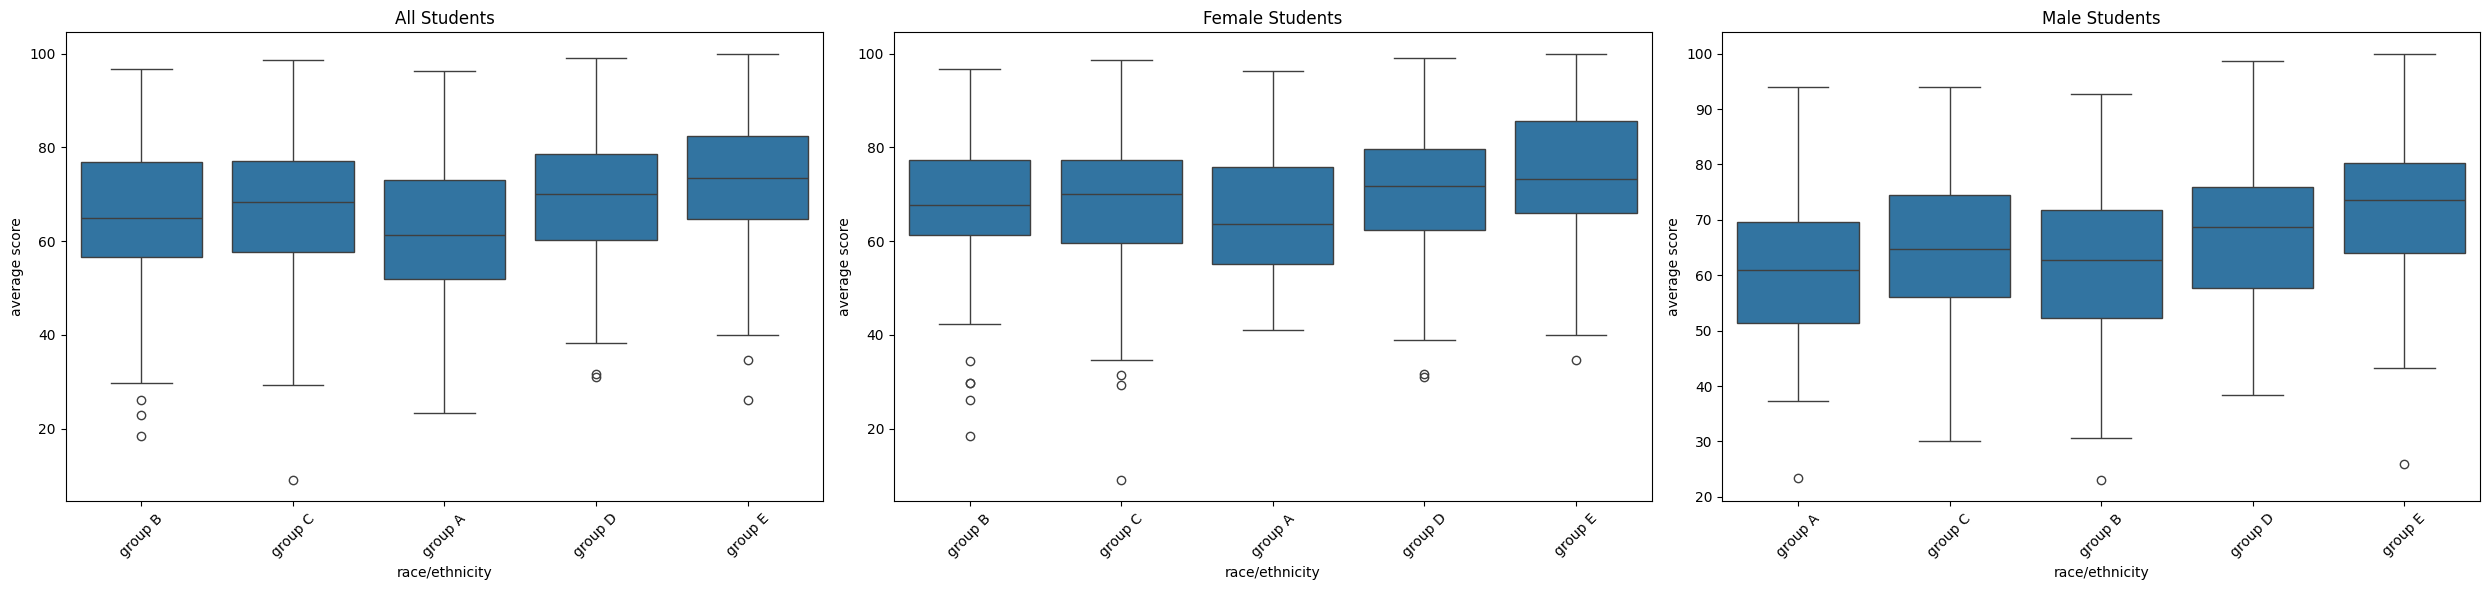

In [23]:
# Set the figure size for better readability
plt.subplots(1, 3, figsize=(25, 6))

# Boxplot for all students showing average scores by race/ethnicity
plt.subplot(131)
sns.boxplot(data=df, x='race/ethnicity', y='average score')
plt.title('All Students')
plt.xticks(rotation=45)

# Boxplot for female students showing average scores by race/ethnicity
plt.subplot(132)
sns.boxplot(data=df[df['gender'] == 'female'], x='race/ethnicity', y='average score')
plt.title('Female Students')
plt.xticks(rotation=45)

# Boxplot for male students showing average scores by race/ethnicity
plt.subplot(133)
sns.boxplot(data=df[df['gender'] == 'male'], x='race/ethnicity', y='average score')
plt.title('Male Students')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Insights
- Students from Group A and Group B tend to perform poorly in exams compared to other groups.
- This trend is consistent regardless of gender, with both male and female students from Group A and Group B showing lower performance.


### 4.2 Maximum Score of Students in All Three Subjects

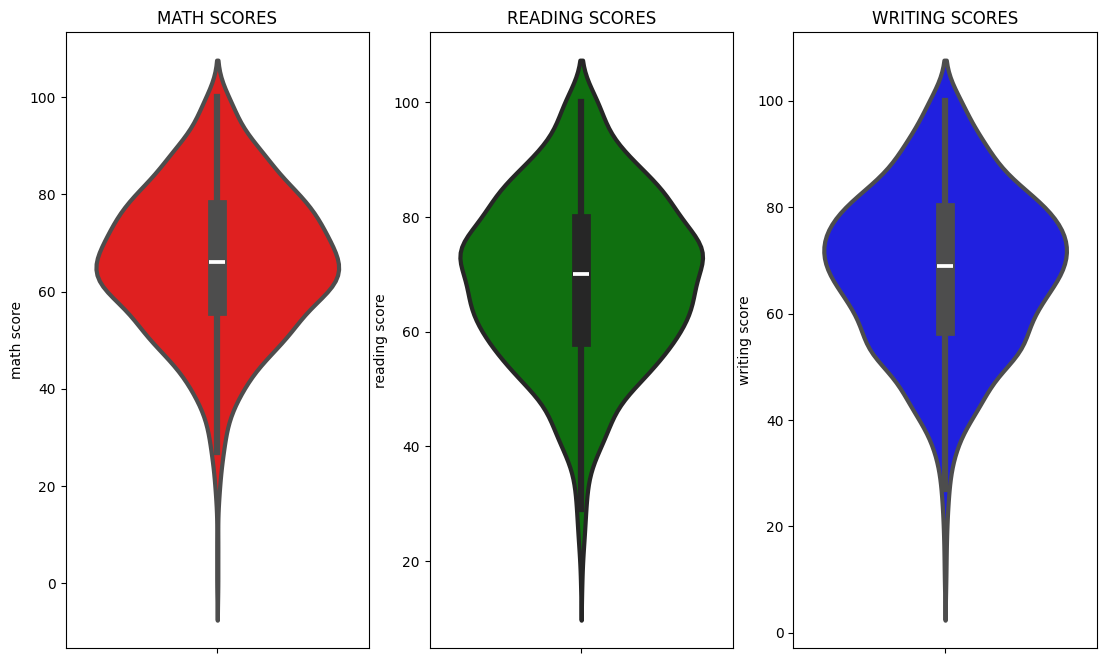

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Insights
- From the violin plots, it is clear that:
  - Most students score between **60-80** in Math.
  - In Reading and Writing, the majority of students score between **50-80**.
  - The distribution shows a slight skew towards higher scores in Reading and Writing compared to Math.

### 4.3 Multivariate Analysis Using Pie Plots

To visualize the distribution of categorical variables, such as `race/ethnicity`, `gender`, and `test preparation course`, we use pie plots.


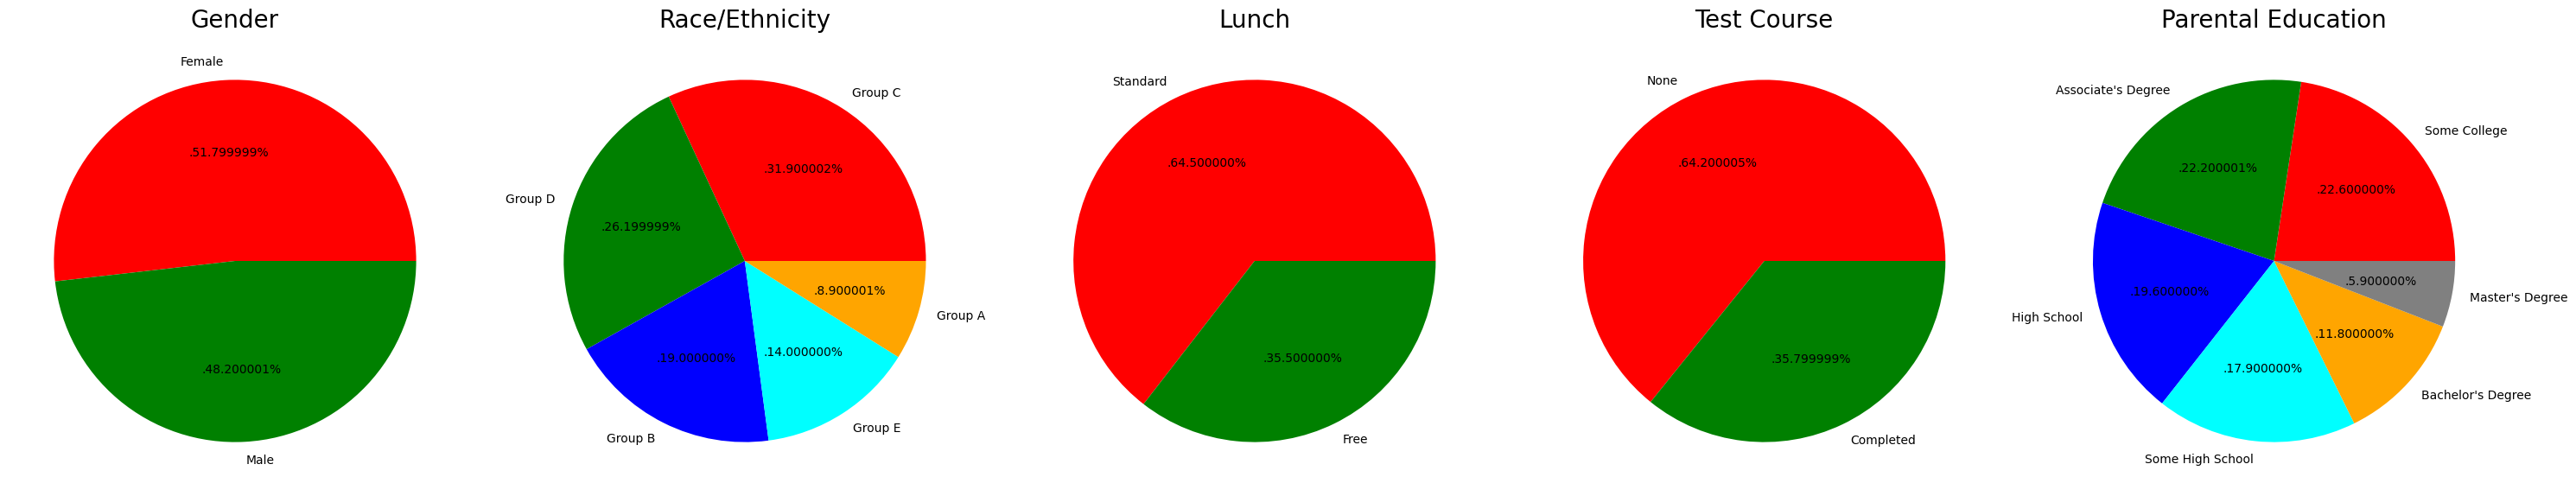

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
- **Gender Distribution**: The number of male and female students is almost equal.
- **Race/Ethnicity Distribution**: The highest number of students belong to **Group C**.
- **Lunch Type**: A greater number of students have **Standard Lunch** compared to those with **Free/Reduced Lunch**.
- **Test Preparation Course**: More students have **not enrolled** in any test preparation course than those who have.
- **Parental Education**: The highest number of students have parents with **Some College** education, followed closely by those with **Associate's Degree**.

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN

**How is the distribution of Gender?**

To understand the distribution of gender, we can visualize the data using a simple bar plot to show the number of male and female students.

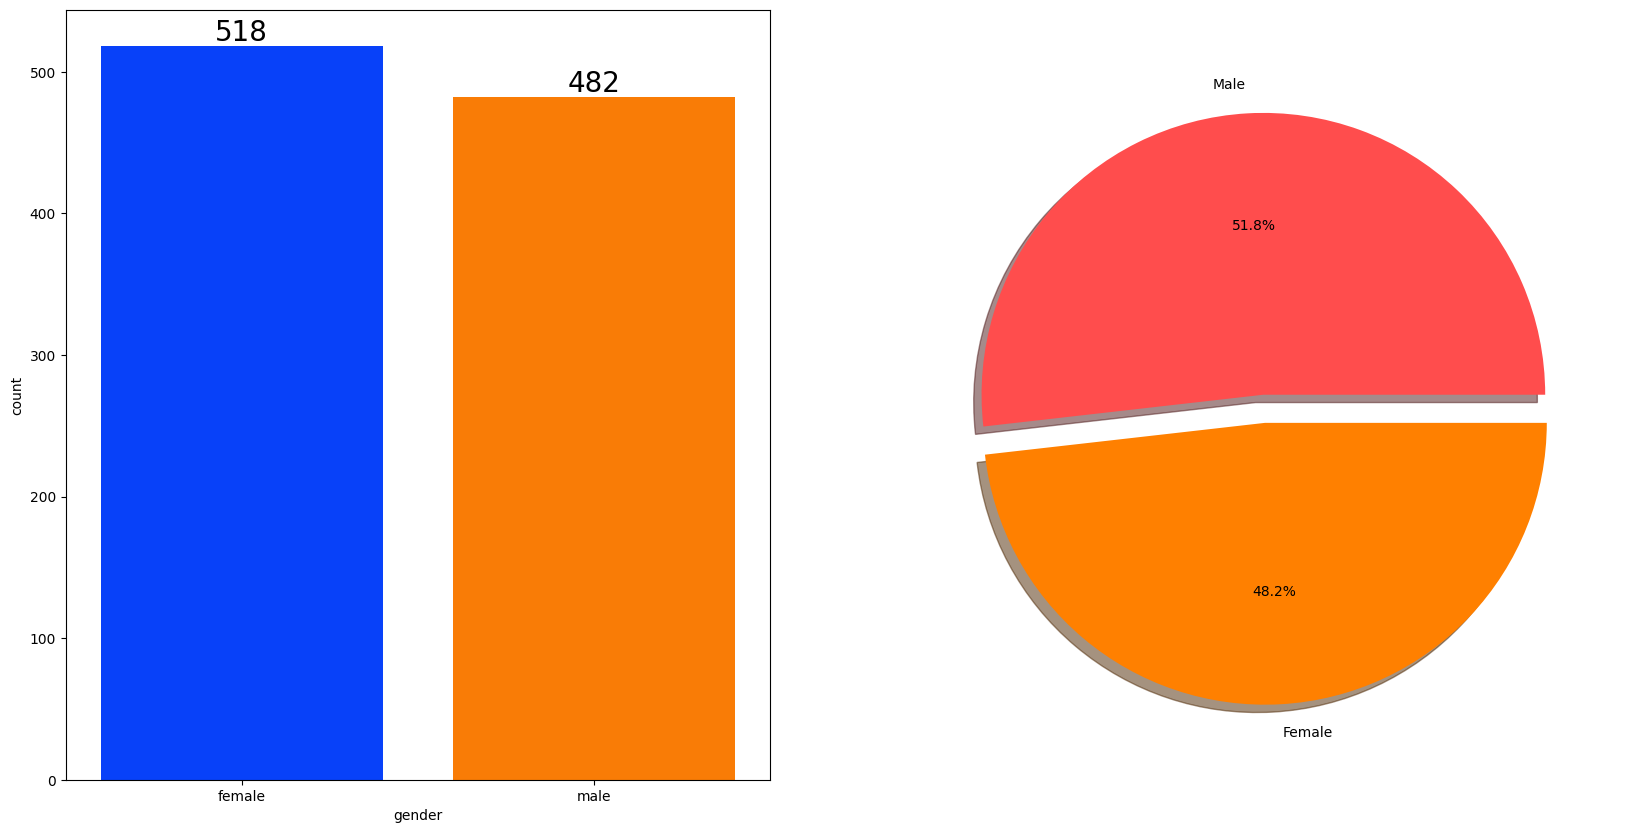

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
- **Gender Distribution**: 
  - **Female students**: 518 (48%)
  - **Male students**: 482 (52%)
  - The gender distribution is quite balanced, with a slight higher number of male students.

### Bivariate Analysis: Does Gender Have Any Impact on Student's Performance?

In [35]:
# Select only numeric columns before performing the groupby operation
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'gender' and calculate the mean of numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

# Display the result
gender_group


,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


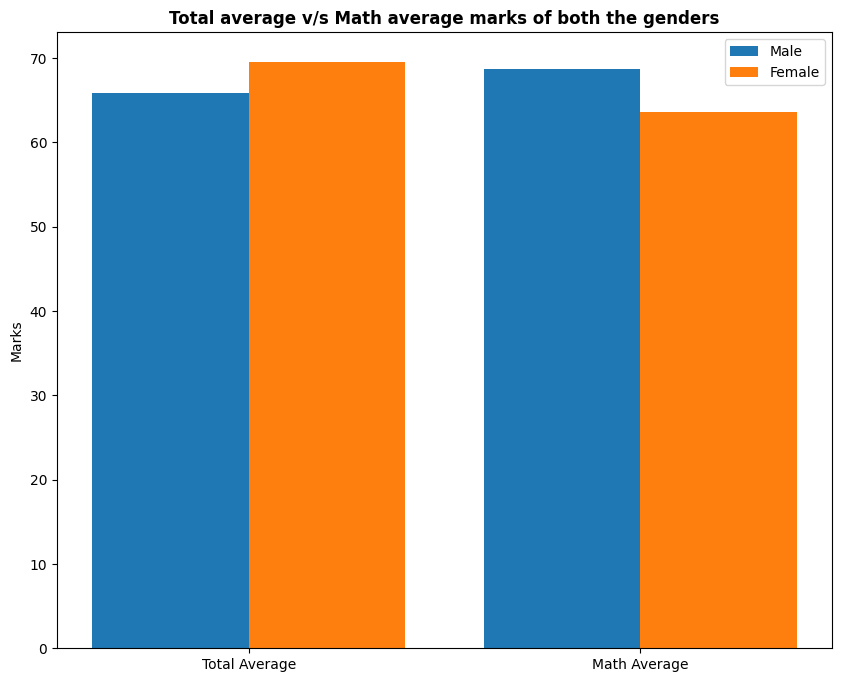

In [37]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
- On average, **females** have a better overall score than **males**.
- However, **males** tend to score higher in **Maths** compared to females.


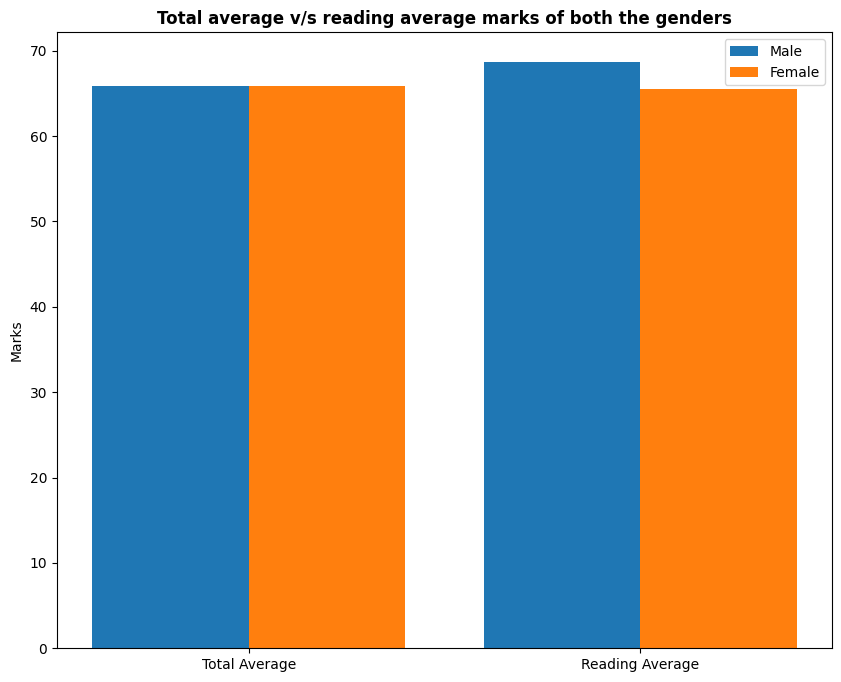

In [38]:
plt.figure(figsize=(10, 8))


X = ['Total Average', 'Reading Average']

female_scores = [gender_group['average score'][0], gender_group['reading score'][0]]
female_scores = [gender_group['average score'][1], gender_group['reading score'][1]]

x_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')


plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s reading average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### 4.4.2 Race/Ethnicity Column: Univariate Analysis

#### How is the Group-wise Distribution?

The group-wise distribution of students based on **Race/Ethnicity** can be analyzed by looking at the count of students in each ethnic group. This will help us understand the representation of each ethnic group in the dataset.

To visualize the group-wise distribution of students, we can use a **count plot**:



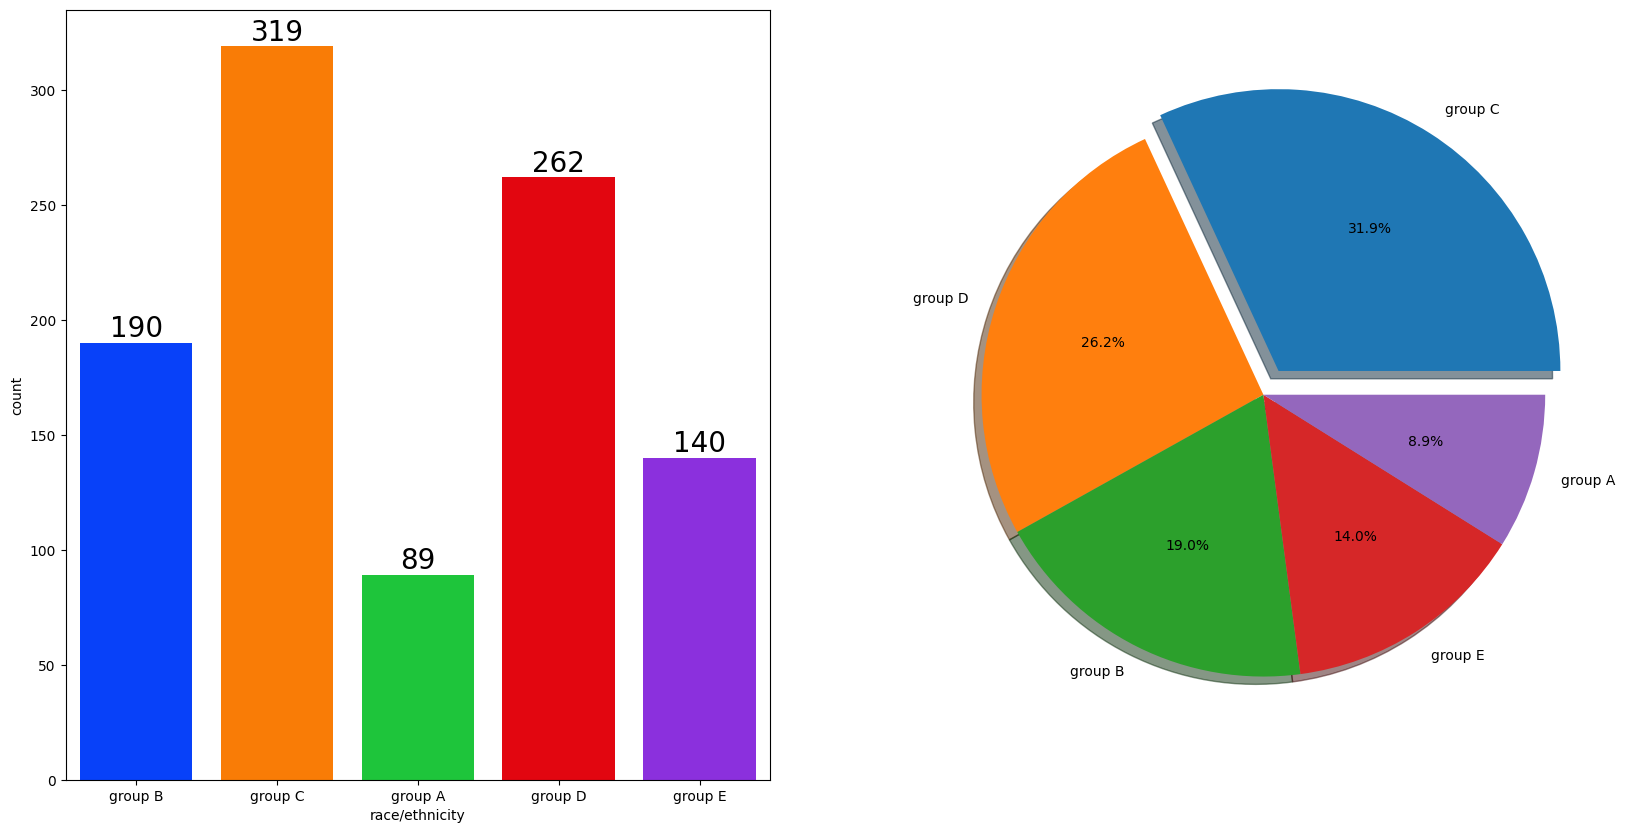

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Insights
- Most of the students belong to group C / group D.
- The lowest number of students belong to group A.

### BIVARIATE ANALYSIS (Is Race/Ethnicity has any impact on student's performance?)


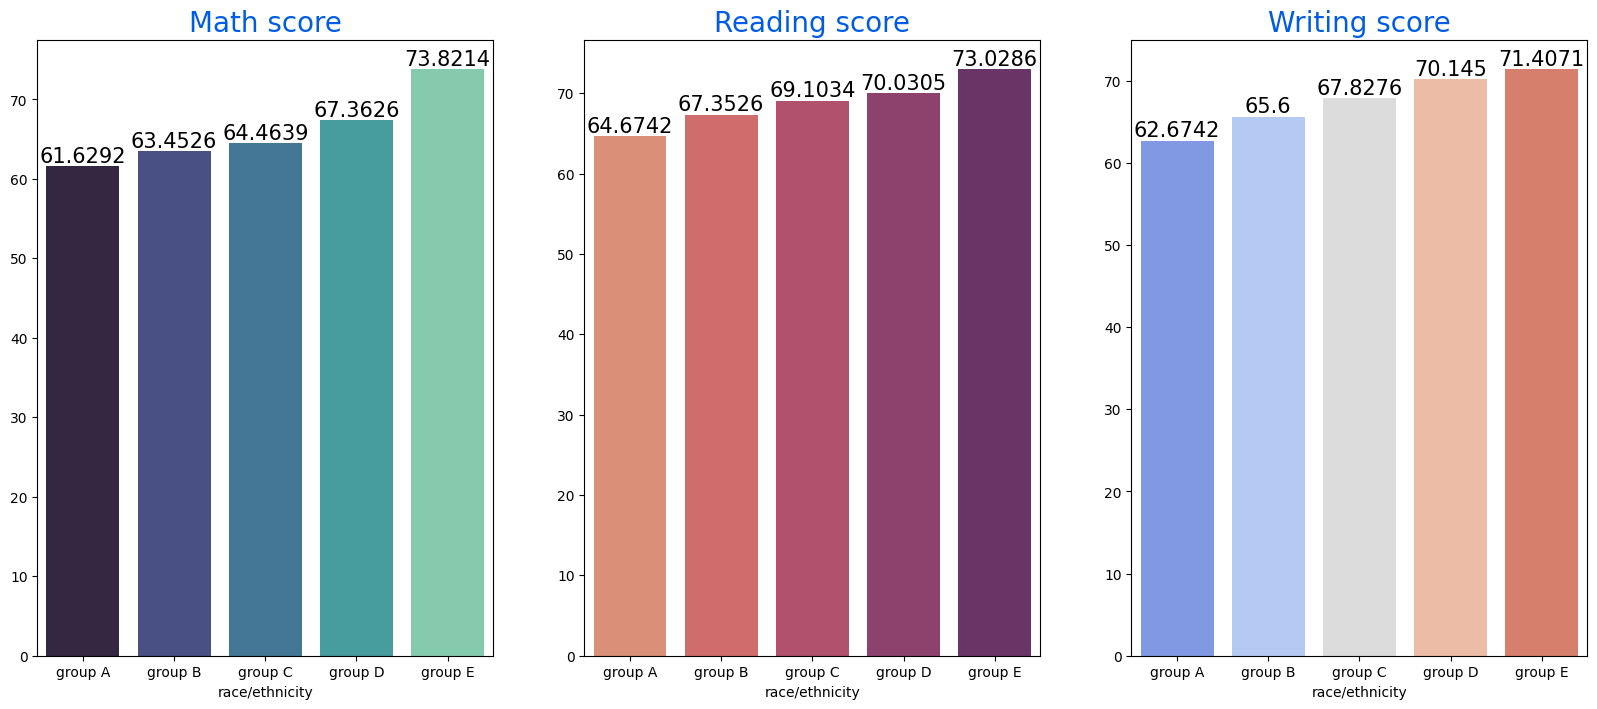

In [40]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower average in all course subjects.

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

#### What is the educational background of student's parent?

### Is parental education has any impact on student's performance?

### UNIVARIATE ANALYSIS (What is the educational background of student's parent?)


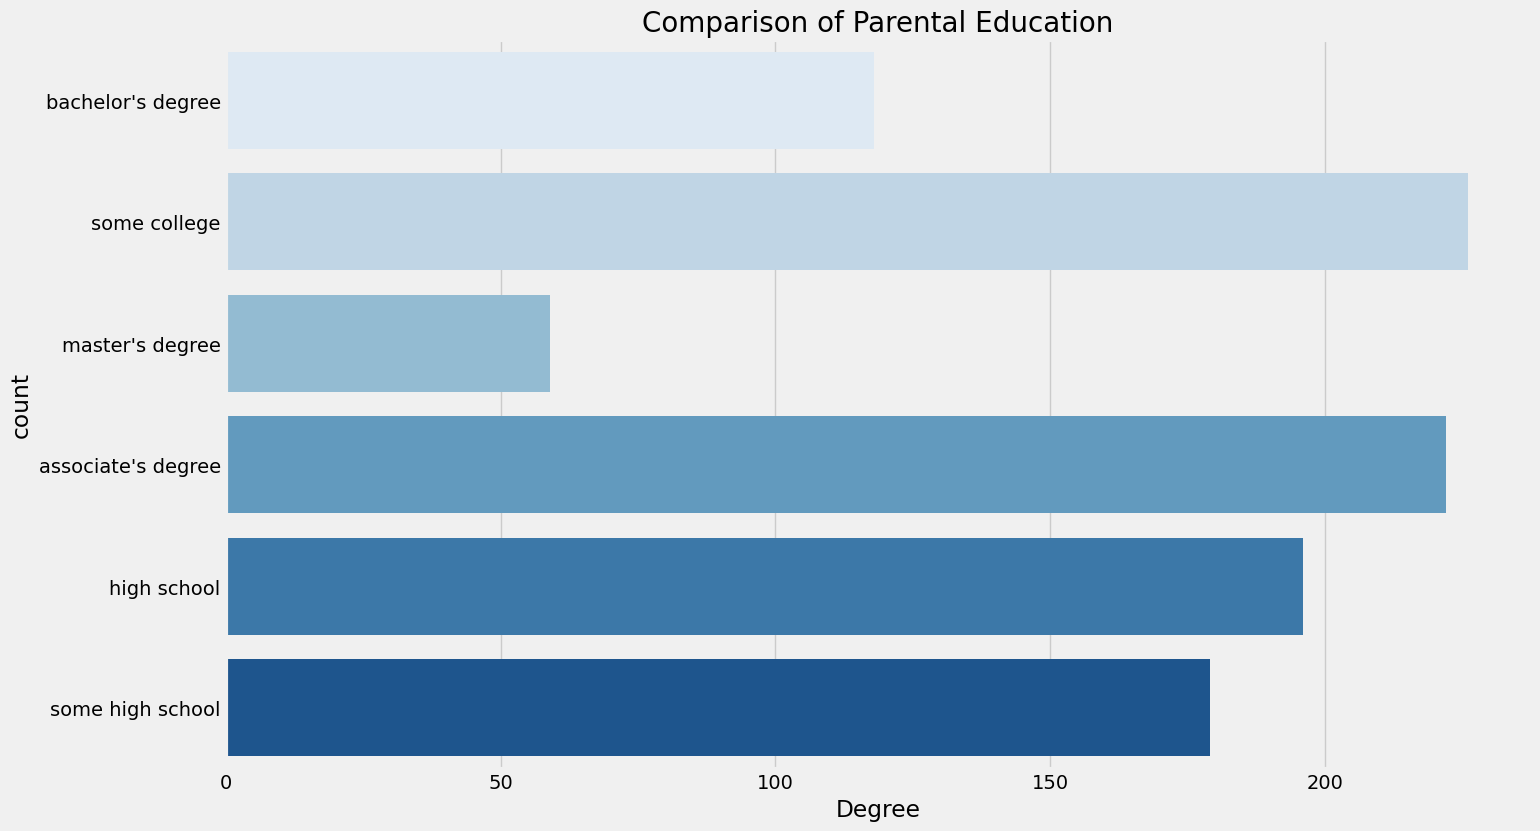

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights

- The largest number of parents are from some college.

### 4.4.4 LUNCH COLUMN

#### Which type of lunch is most common among students?

- The distribution of students based on the type of lunch is shown below.

- Most students have the "Standard" lunch type, followed by "Free/Reduced" lunch.

#### Univariate Analysis (Lunch Type Distribution) 


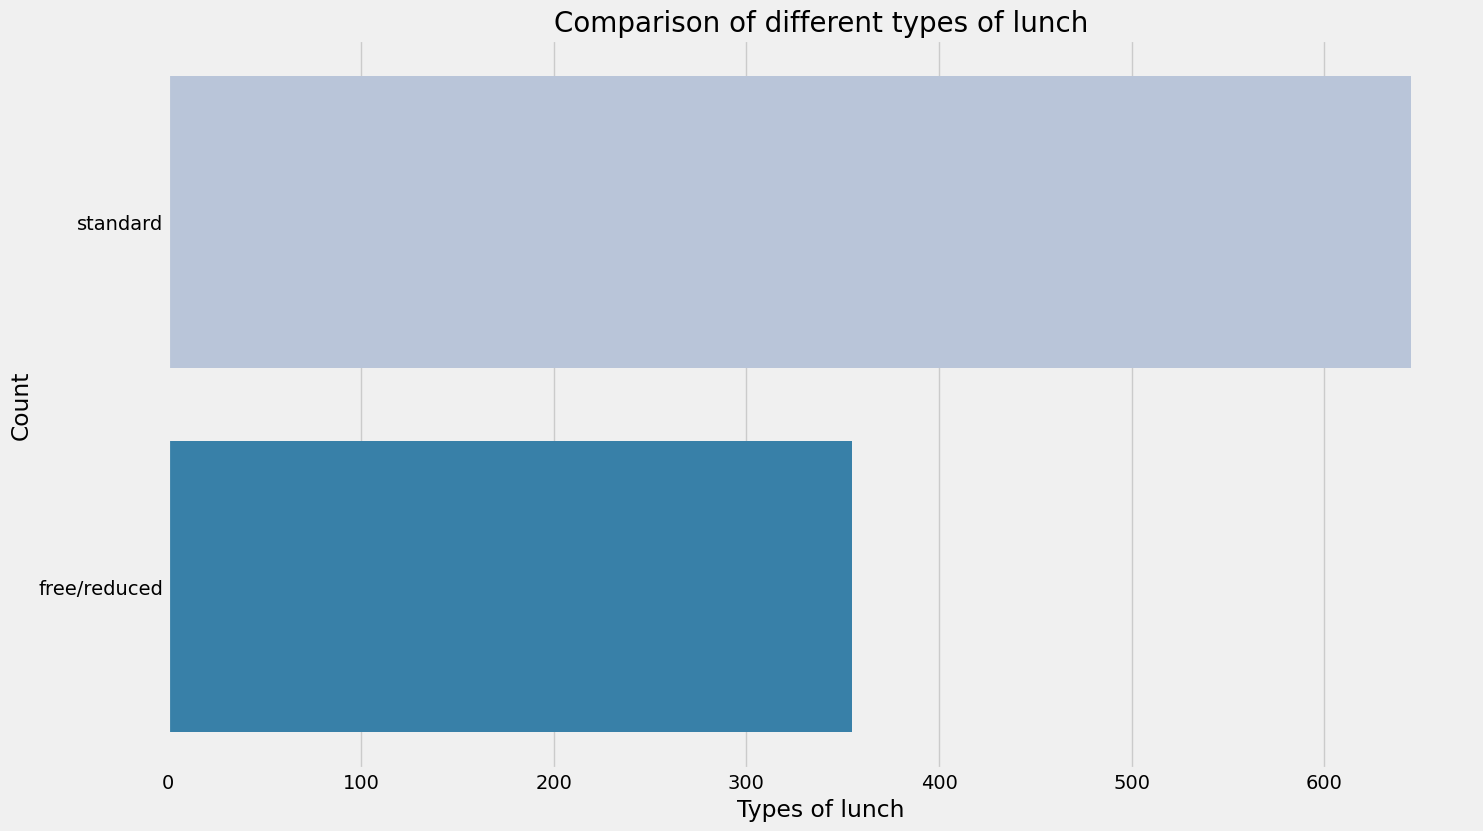

In [47]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()



### BIVARIATE ANALYSIS (Does lunch type intake have any impact on student's performance?)

To understand the impact of lunch type on student performance, we will compare the average scores based on the lunch type. We will visualize the comparison using a boxplot, where the x-axis will represent the type of lunch (Standard or Free), and the y-axis will represent the average scores of the students.

The goal is to observe any significant differences in performance between students who had standard lunch and those who had free lunch.


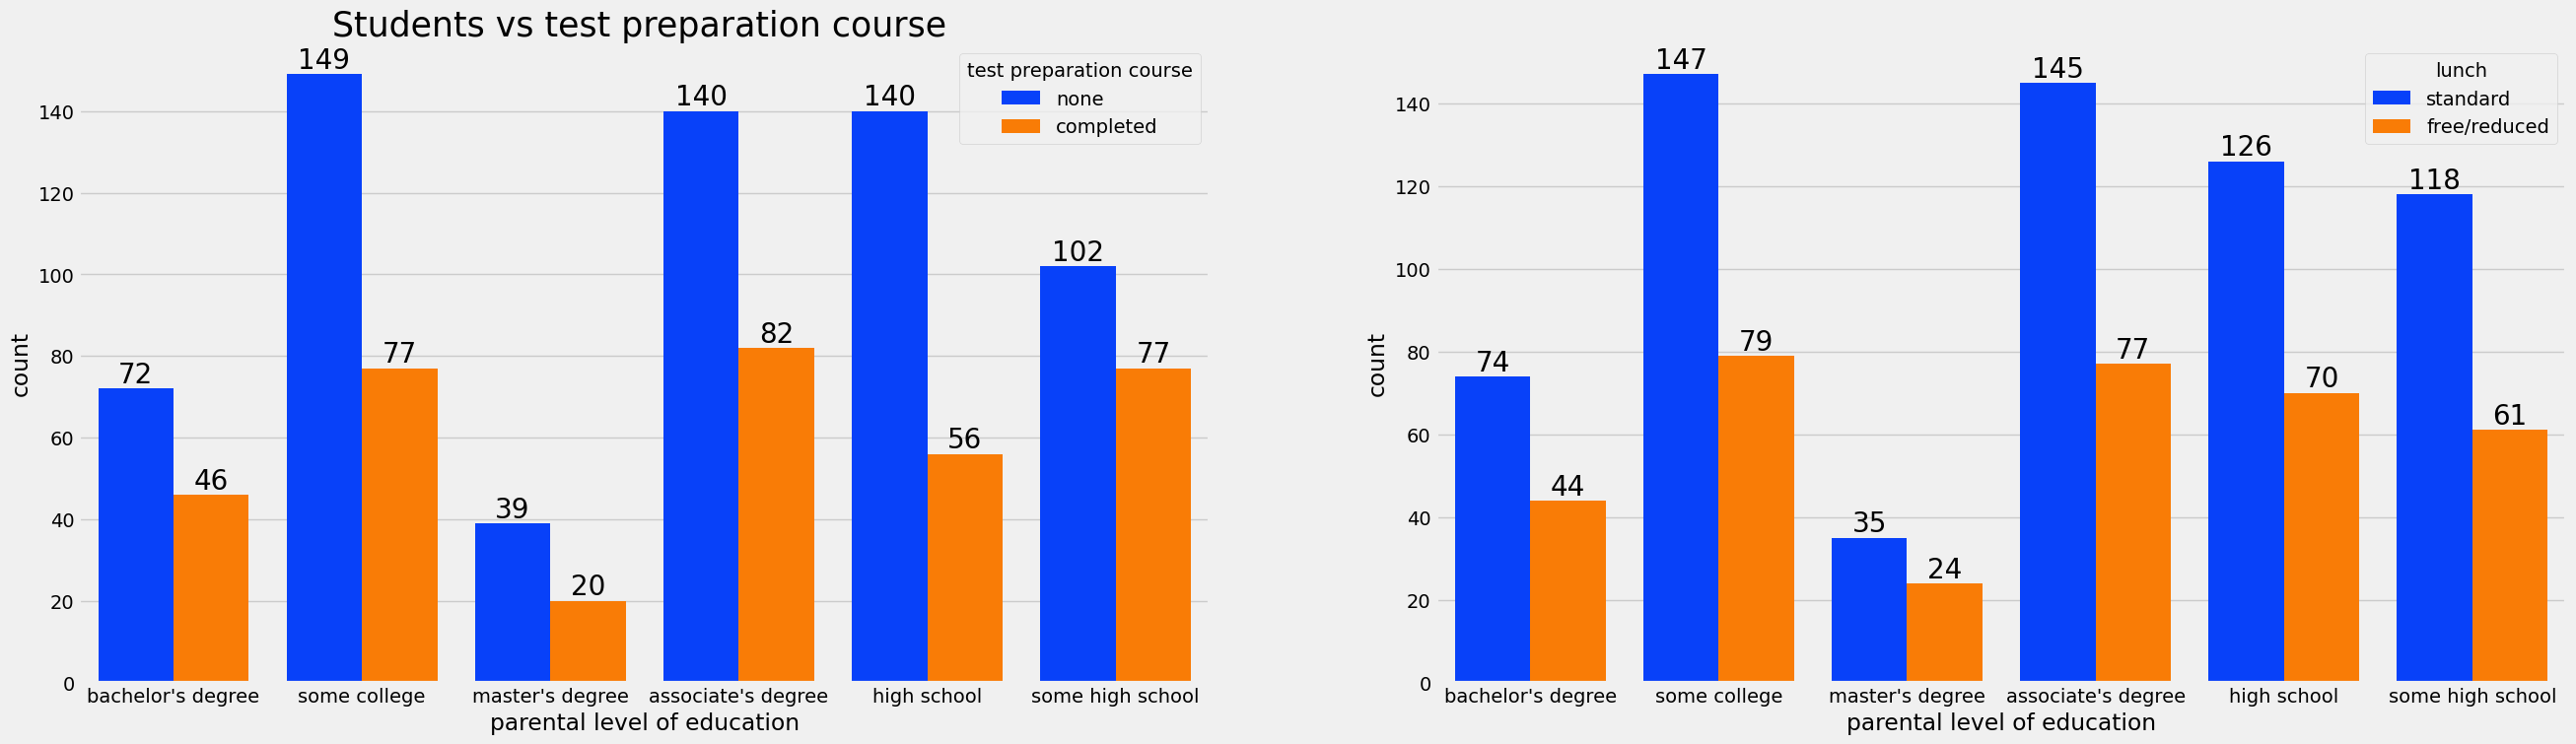

In [51]:
f,ax=plt.subplots(1,2,figsize=(29,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

**Insights**
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

**4.4.5 TEST PREPARATION COURSE COLUMN**
* Which type of lunch is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

**BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )**

<Axes: xlabel='lunch', ylabel='writing score'>

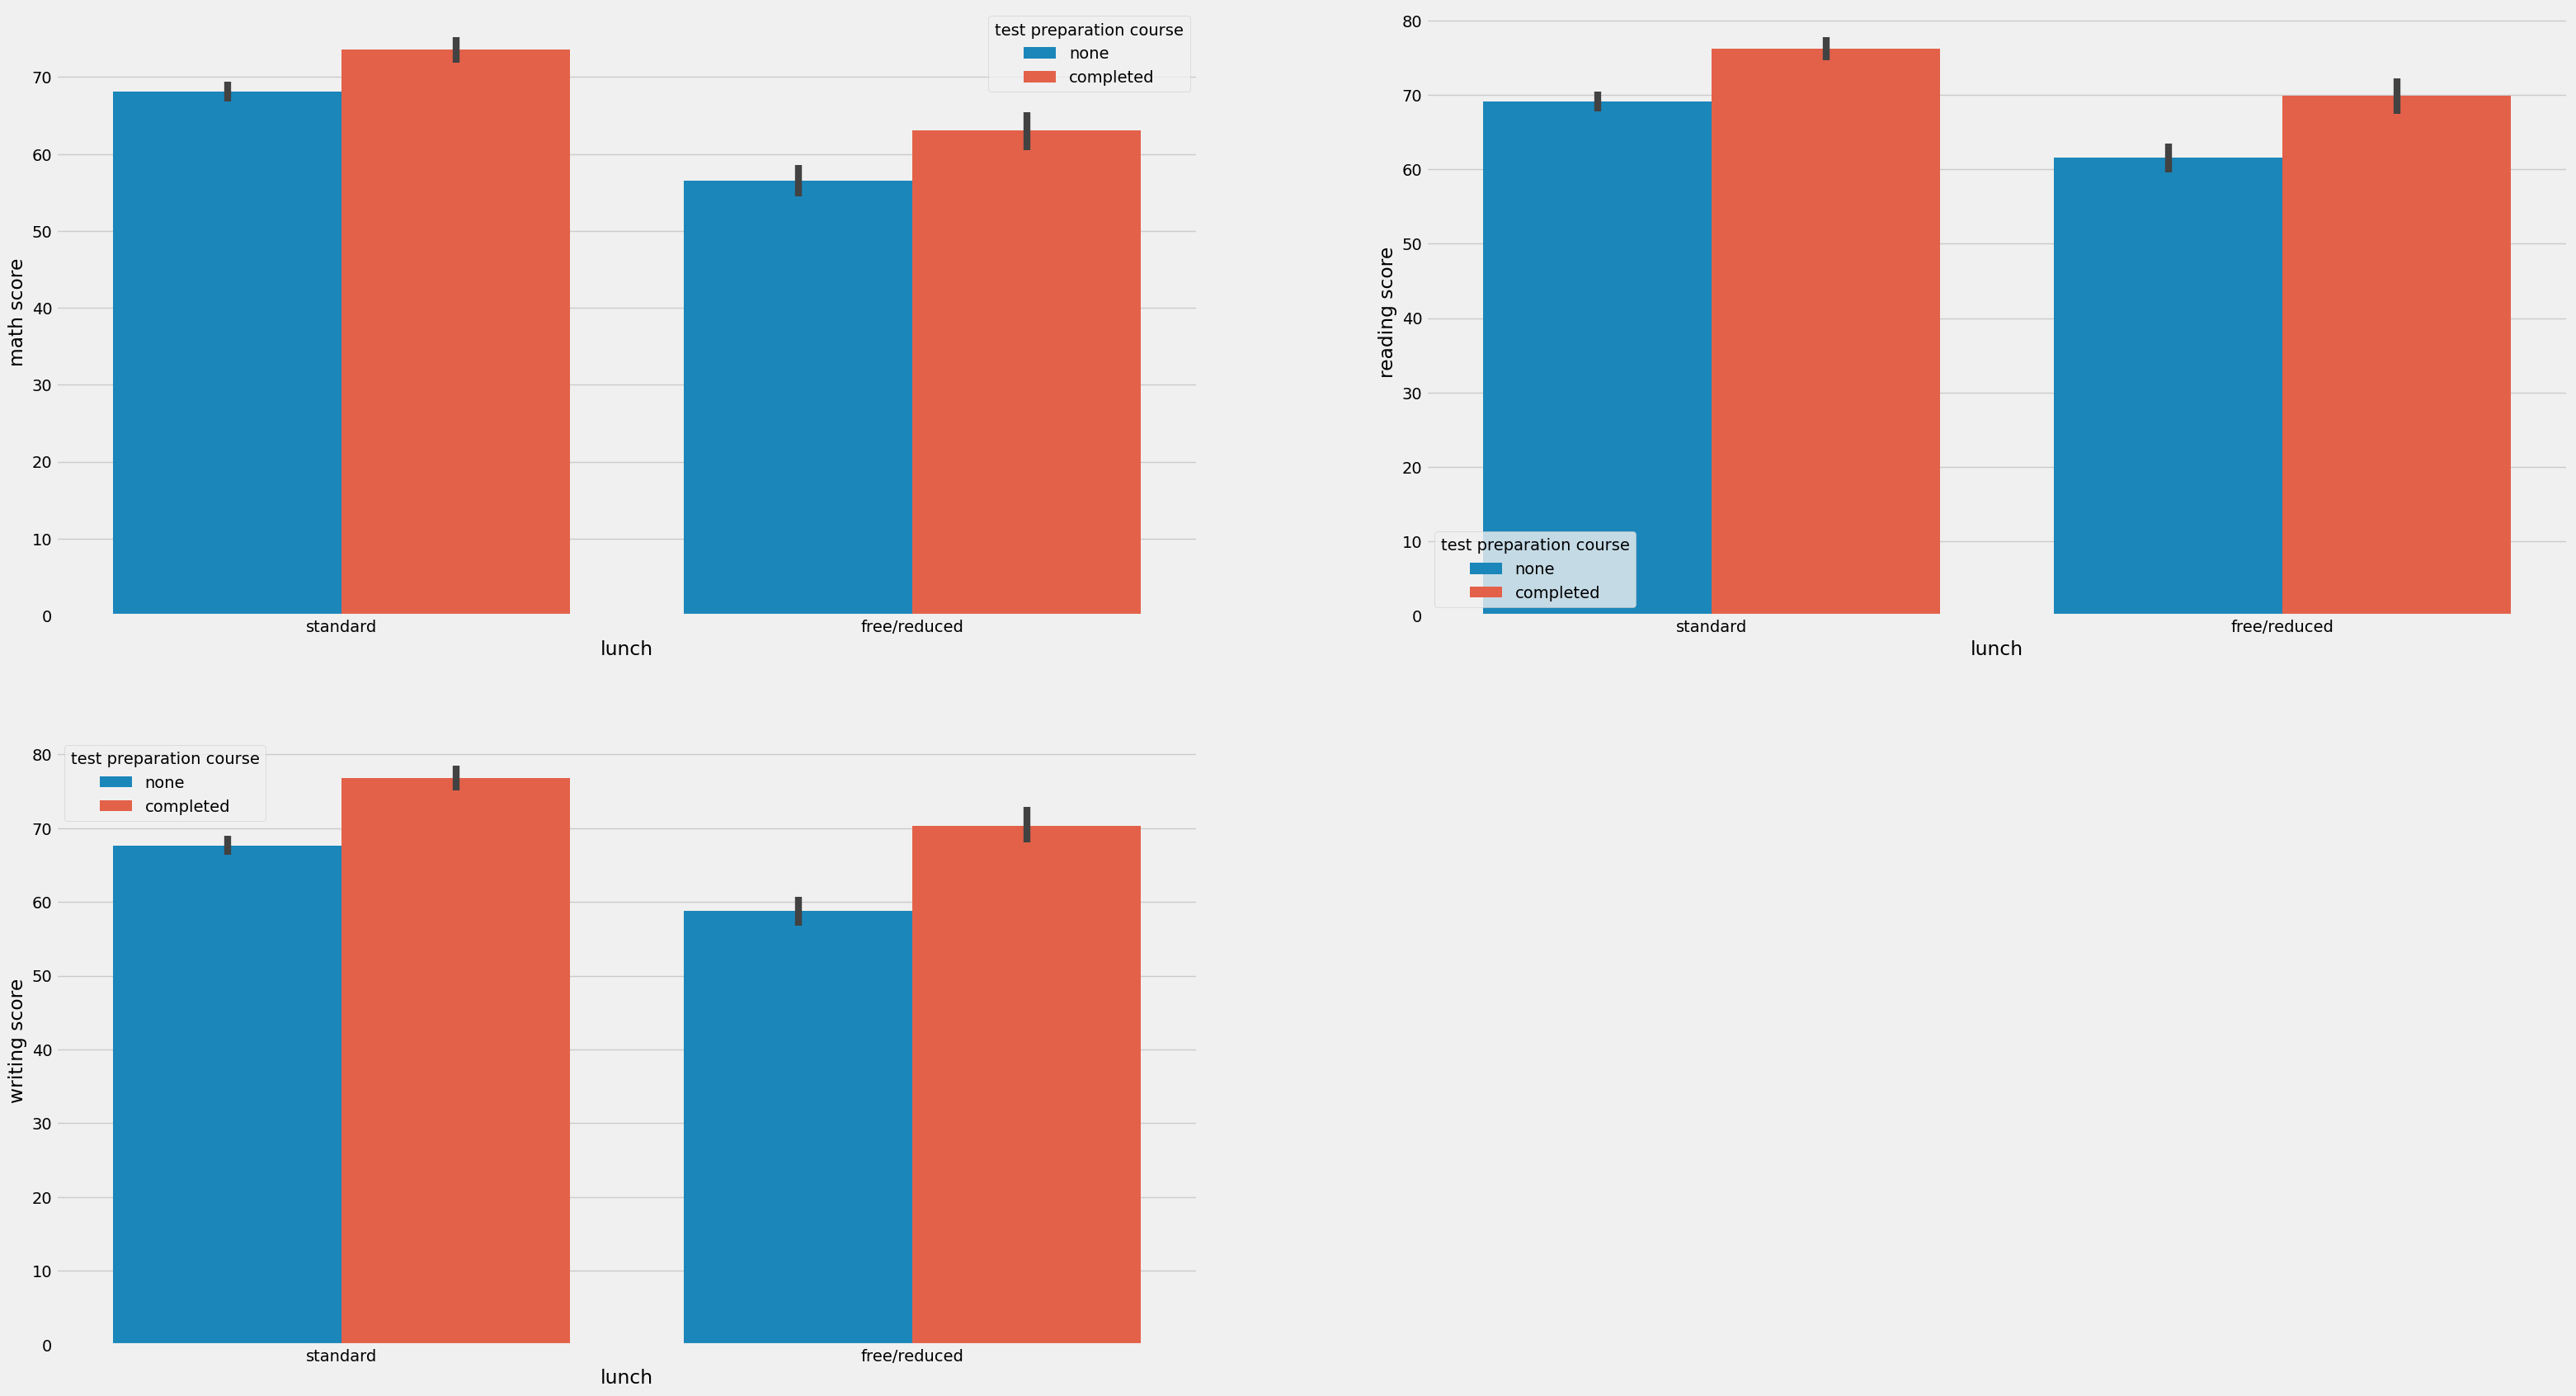

In [57]:
plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### 4.4.6 CHECKING OUTLIERS

- Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course.



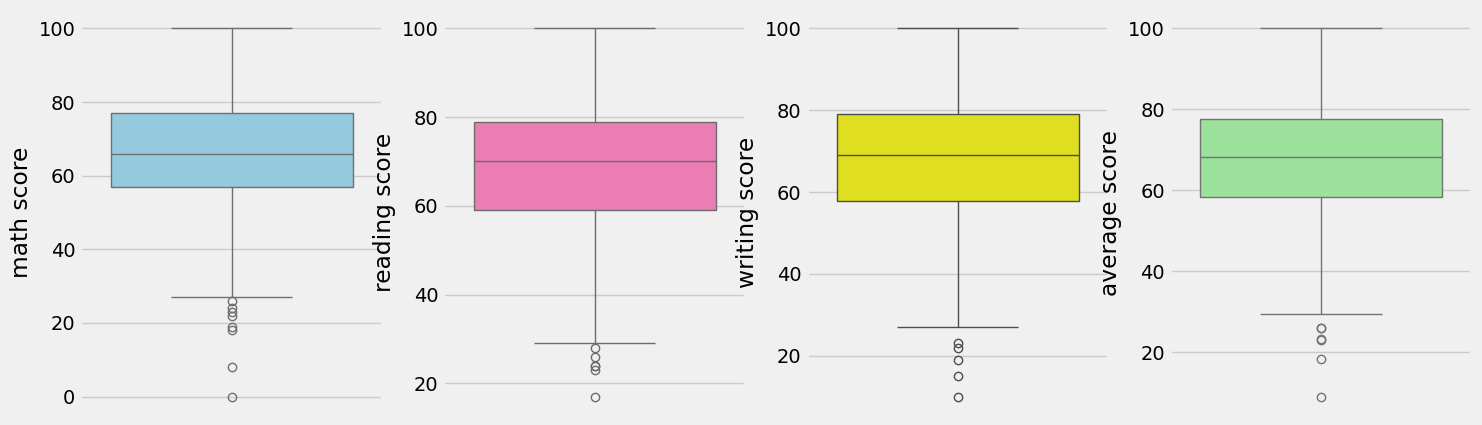

In [59]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

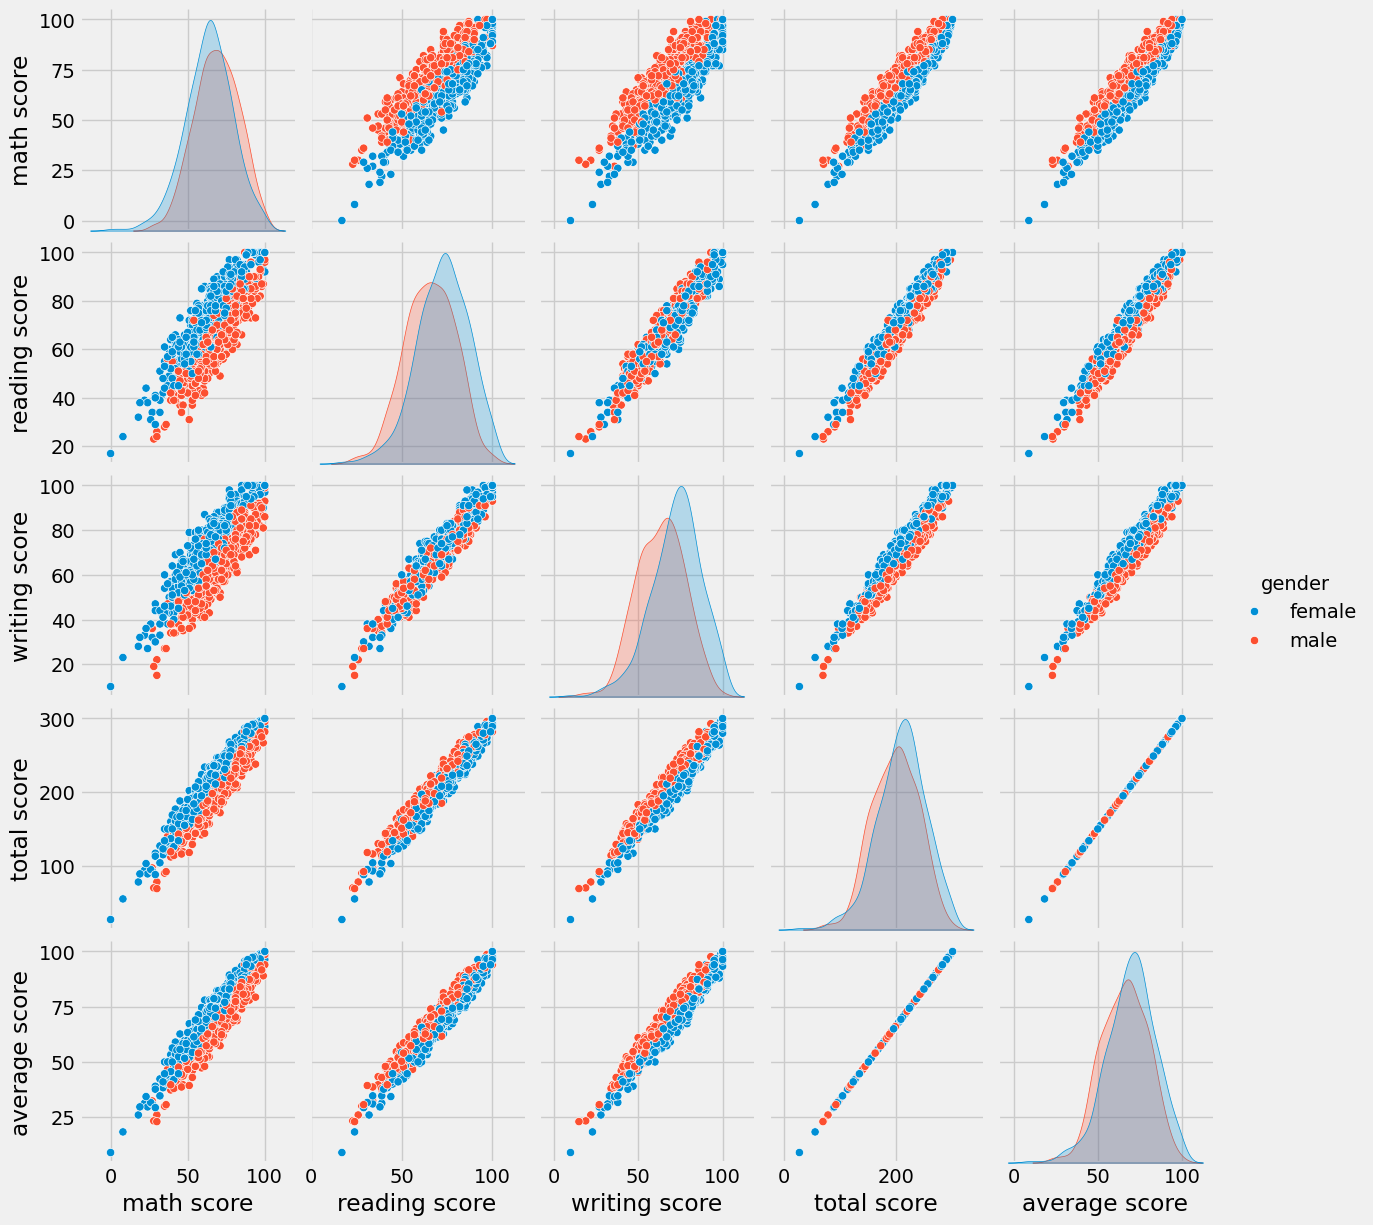

In [60]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights
-  From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions

- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is not much related with test preparation course.
- Finishing preparation course is beneficial.
